<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 다룰 내용

- 학습 데이터 양이 많으면 성능이 좋아질까요?
- 학습 데이터 양에 따른 성능(Learning Curve)을 확인해봅니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/airline_satisfaction.csv'
data = pd.read_csv(path)

# 10,000개만 추출
data = data.head(10000) 

# 확인
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [3]:
# 불필요한 변수 제거
del_cols = ['id', 'departure/arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes']
data.drop(del_cols, axis=1, inplace=True)

# 결측치 제거
data.dropna(inplace=True)

# 가변수화
dumm_cols = ['gender', 'customer_type', 'type_of_travel', 'class']
data = pd.get_dummies(data, columns=dumm_cols, drop_first=True)

# 확인
data.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,...,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,...,4,5,5,18.0,0,1,0,1,0,1
1,25,235,3,3,1,3,1,1,1,5,...,1,4,1,6.0,0,1,1,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,...,4,4,5,0.0,1,0,0,0,0,0
3,25,562,2,5,2,2,2,2,2,5,...,1,4,2,9.0,0,0,0,0,0,0
4,61,214,3,3,4,5,5,3,3,4,...,3,3,3,0.0,1,1,0,0,0,0


In [4]:
# x, y 분리
target = 'satisfaction'

x = data.drop(target, axis=1)
y = data.loc[:, target]

# 데이터 크기 확인
x.shape

(9974, 20)

**1) max_depth=3**

In [5]:
# 모듈 둘러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

# 모셀선언
model = DecisionTreeClassifier(max_depth=3)

# Learning Curve 수행
tr_size, tr_scores, val_scores = learning_curve(model, 
                                                x, 
                                                y,
                                                train_sizes=range(10, 7900, 20),
                                                shuffle=True,
                                                cv=5)

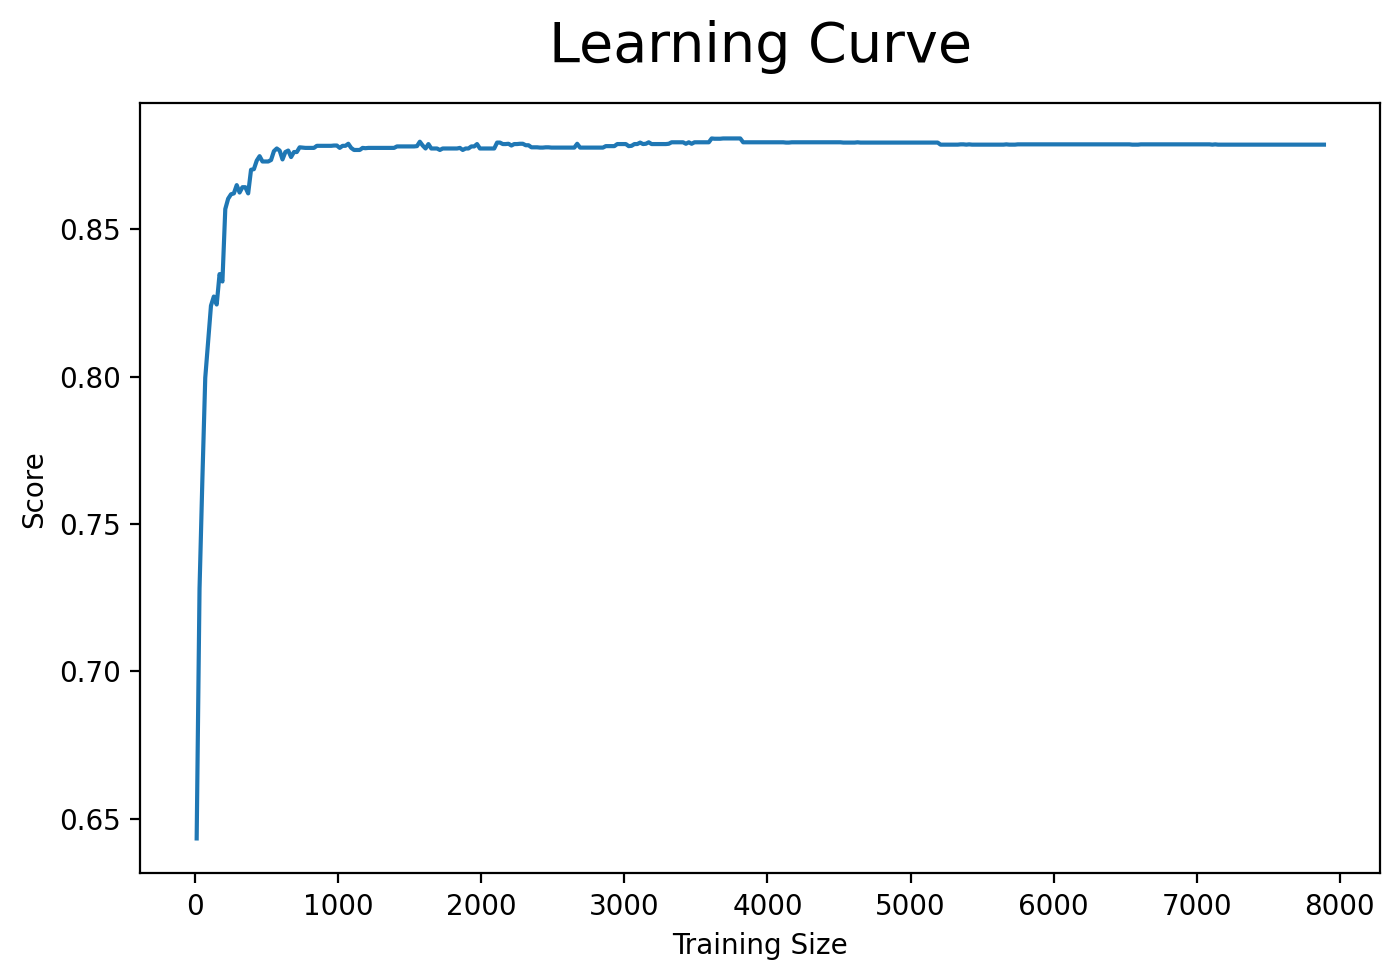

In [6]:
# CV 결과 --> 평균
val_scores_3_mean = val_scores.mean(axis=1)

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(tr_size, val_scores_3_mean)
plt.title('Learning Curve', size=20, pad=15)
plt.ylabel('Score')
plt.xlabel('Training Size')
plt.show()

**2) max_depth=5**

In [7]:
# 모듈 둘러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

# 모셀선언
model = DecisionTreeClassifier(max_depth=5)

# Learning Curve 수행
tr_size, tr_scores, val_scores = learning_curve(model, 
                                                x, 
                                                y,
                                                train_sizes=range(10, 7900, 20),
                                                shuffle=True,
                                                cv=5)

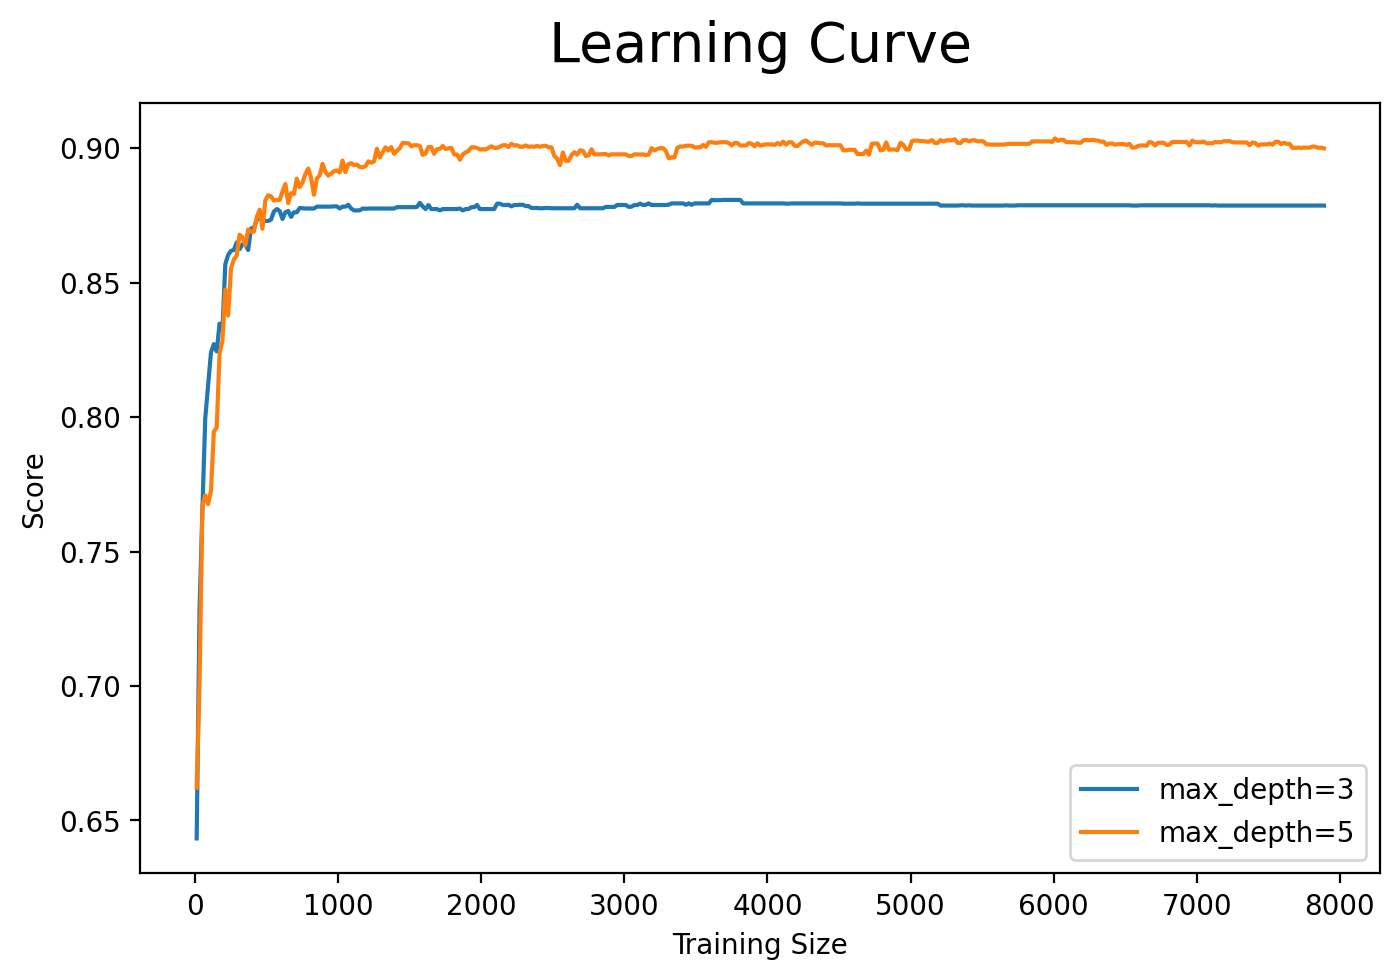

In [8]:
# CV 결과 --> 평균
val_scores_5_mean = val_scores.mean(axis=1)

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(tr_size, val_scores_3_mean)
plt.plot(tr_size, val_scores_5_mean)
plt.title('Learning Curve', size=20, pad=15)
plt.ylabel('Score')
plt.xlabel('Training Size')
plt.legend(['max_depth=3', 'max_depth=5'])
plt.show()